# Capacitated Vehicle Routing Problem

<img src="http://neo.lcc.uma.es/dynamic/images/vrp.png" width="400" />

- $n$ is the number of clientes
- $N$ is set of clients, with $N=\{1,2,...,n\}$
- $V$ is set of vetices (or nodes), with $V=\{0\}\cup N$
- $A$ is set of arcs, with $A=\{(i,j)\in V^2 : i\neq j\}$
- $c_{ij}$ is cost of travel over arc $(i,j)\in A$
- $Q$ is the vehicle capacity
- $q_i$ is the amount that has to be delivered to customer $i\in N$

Then, the formulation is the following
$$\begin{align}
\min \quad & \sum_{i,j\in A} c_{ij} x_{ij} \\
\text{s.t.} \quad & \sum_{j\in V , j\neq i} x_{ij} = 1  && i \in N \\
& \sum_{i\in V , i\neq j} x_{ij} = 1 && j \in N \\
& \text{if} \ x_{ij}=1 \ \Rightarrow \ u_i + q_j = u_j && i,j \in A : j\neq 0, i\neq 0 \\
& q_i \leq u_i \leq Q && i \in N \\
& x_{ij} \in \{0,1\} && i,j \in A
\end{align}$$

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model

In [157]:
file_path = 'dataset.txt'
column_names = ["CUST NO.", "XCOORD.", "YCOORD.", "DEMAND", "READY TIME", "DUE DATE", "SERVICE TIME"]

df = pd.read_csv(file_path, delim_whitespace=True, names=column_names)
df = df.head(30)

df.head()

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME
0,1,35.0,35.0,0.0,0.0,230.0,0.0
1,2,41.0,49.0,10.0,161.0,171.0,10.0
2,3,35.0,17.0,7.0,50.0,60.0,10.0
3,4,55.0,45.0,13.0,116.0,126.0,10.0
4,5,55.0,20.0,19.0,149.0,159.0,10.0


In [158]:
xc = df['XCOORD.'].values
yc = df['YCOORD.'].values

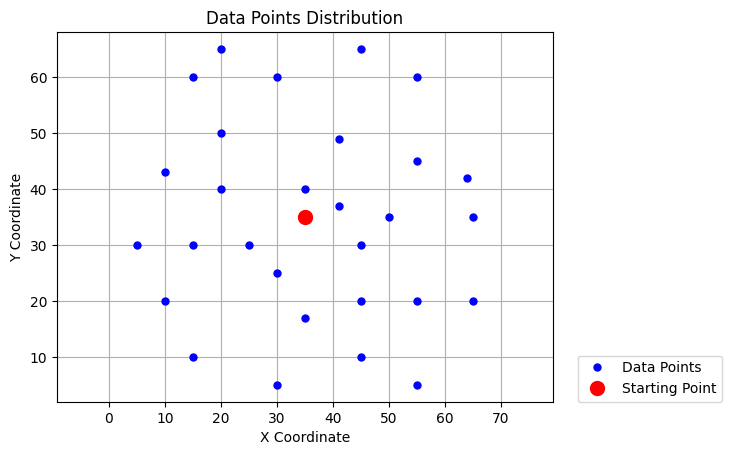

In [159]:
plt.plot(df["XCOORD."], df["YCOORD."], ".", color="blue", markersize=10, label="Data Points")
plt.plot(df["XCOORD."][0], df["YCOORD."][0], "o", color="red", markersize=10, label="Starting Point")

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Data Points Distribution")

plt.xlim(0)
plt.ylim(0)
plt.axis('equal')

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
plt.show()

In [160]:
n = len(df)-1
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}
Q = 200
q = df['DEMAND'].values

In [161]:
mdl = Model('CVRP')

In [162]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [163]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A))
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
mdl.parameters.timelimit = 15
solution = mdl.solve(log_output=True)

Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               15
Found incumbent of value 1350.835706 after 0.00 sec. (0.08 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 29 rows and 0 columns.
MIP Presolve modified 406 coefficients.
Aggregator did 406 substitutions.
Reduced MIP has 464 rows, 1305 columns, and 2900 nonzeros.
Reduced MIP has 870 binaries, 0 generals, 0 SOSs, and 812 indicators.
Presolve time = 0.02 sec. (3.91 ticks)
Probing time = 0.01 sec. (7.93 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 464 rows, 1305 columns, and 2900 nonzeros.
Reduced MIP has 870 binaries, 0 generals, 0 SOSs, and 812 indicators.
Presolve time = 0.00 sec. (2.10 ticks)
Probing time = 0.00 sec. (2.42 ticks)
Clique table members: 464.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root

In [164]:
print(solution)

solution for: CVRP
objective: 345.99
status: FEASIBLE_SOLUTION(1)
x_0_1=1
x_0_6=1
x_1_20=1
x_2_15=1
x_3_29=1
x_4_23=1
x_5_18=1
x_6_13=1
x_7_19=1
x_8_7=1
x_9_3=1
x_10_27=1
x_11_10=1
x_12_28=1
x_13_2=1
x_14_16=1
x_15_14=1
x_16_17=1
x_17_5=1
x_18_8=1
x_19_11=1
x_20_9=1
x_21_26=1
x_22_21=1
x_23_22=1
x_24_25=1
x_25_4=1
x_26_12=1
x_27_0=1
x_28_0=1
x_29_24=1
u_1=10.000
u_2=33.000
u_3=48.000
u_4=85.000
u_5=108.000
u_6=3.000
u_7=134.000
u_8=129.000
u_9=35.000
u_10=179.000
u_11=163.000
u_12=179.000
u_13=26.000
u_14=61.000
u_15=41.000
u_16=80.000
u_17=82.000
u_18=120.000
u_19=151.000
u_20=19.000
u_21=143.000
u_22=132.000
u_23=114.000
u_24=60.000
u_25=66.000
u_26=160.000
u_27=195.000
u_28=195.000
u_29=57.000



In [165]:
solution.solve_status

<JobSolveStatus.FEASIBLE_SOLUTION: 1>

In [166]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

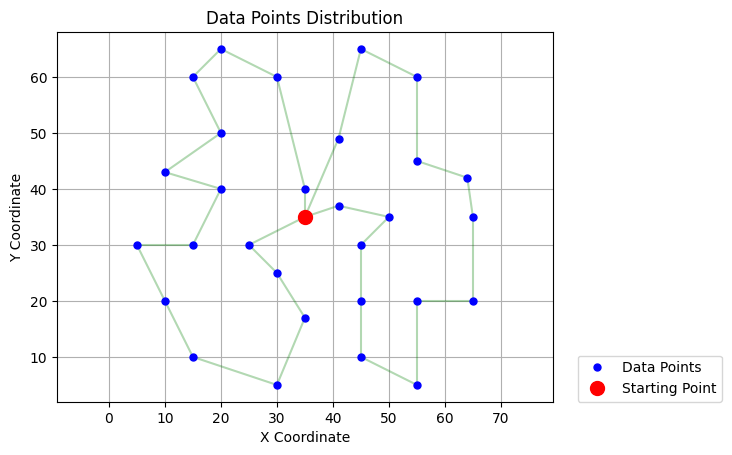

In [167]:
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', alpha=0.3)

plt.plot(df["XCOORD."], df["YCOORD."], ".", color="blue", markersize=10, label="Data Points")
plt.plot(df["XCOORD."][0], df["YCOORD."][0], "o", color="red", markersize=10, label="Starting Point")

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Data Points Distribution")

plt.xlim(0)
plt.ylim(0)
plt.axis('equal')

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
plt.show()